In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings 
filterwarnings('ignore')

### Tech stocks used for Analysis

In [2]:
path = 'E:\Time Series Analysis'
company_list = ['EBAY_data.csv', 'FB_data.csv', 'GE_data.csv', 'IBM_data.csv']

#Blank DataFrame
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path + '/' + file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(5036, 7)

In [3]:
all_data.head()

date   open   high    low  close    volume  Name
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY

In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [6]:
all_data['date'][0]

0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [7]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### Analyse closing price of all the stocks

In [8]:
tech_list=all_data['Name'].unique()

In [9]:
tech_list

array(['EBAY', 'FB', 'GE', 'IBM'], dtype=object)

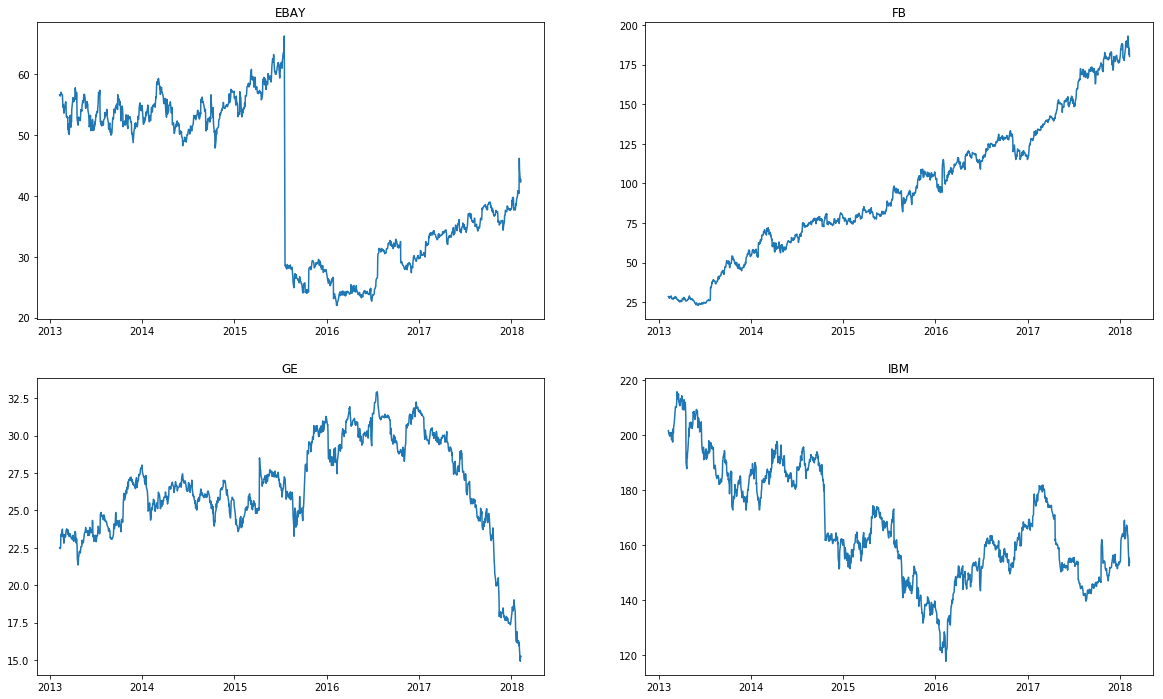

In [10]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

### Analysing the total volume of stock being traded each day

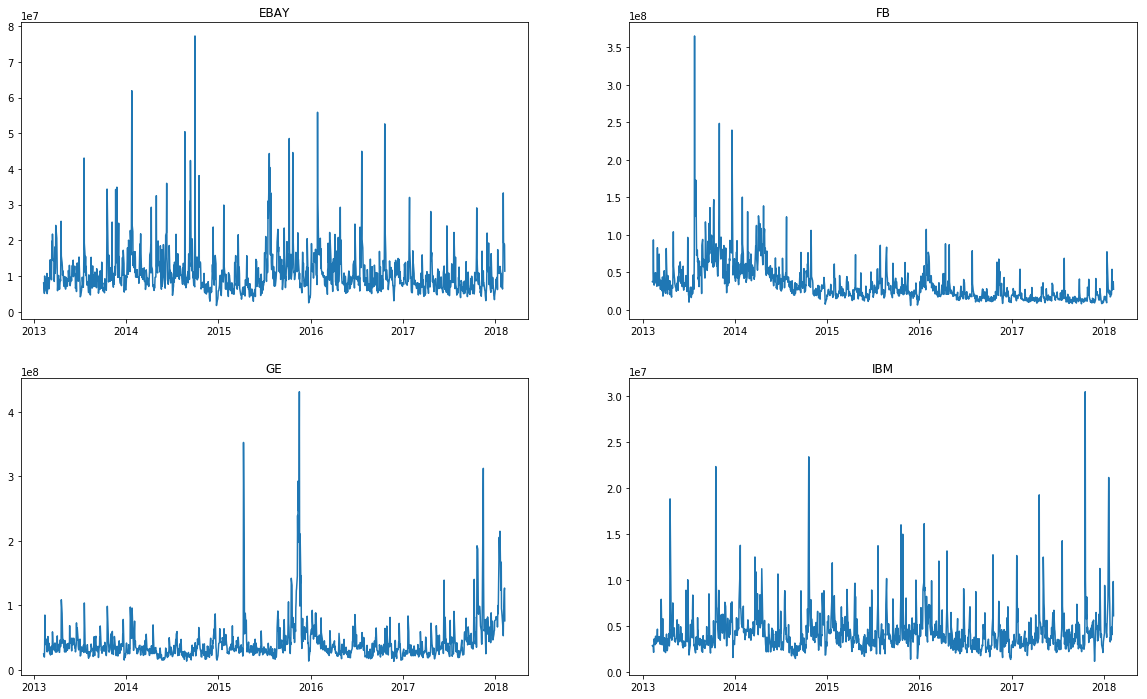

In [11]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'], df['volume'])
    plt.title(company)

### Using Plotly

In [12]:
import plotly.express as px

In [13]:
for company in (tech_list):
    df = all_data[all_data['Name']==company]
    fig = px.line(df, x='date', y='volume', title=company)
    fig.show()

### Analyse daily price change in stock
#### To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [14]:
df = pd.read_csv("E:\Time Series Analysis/EBAY_data.csv")
df.head()

date   open   high    low  close    volume  Name
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY

### Percentage return

In [15]:
df['1day % return'] = ((df['close']-df['open'])/df['close'])*100
df.head()

date   open   high    low  close    volume  Name  1day % return
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY       0.282586
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY      -0.195001
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY       0.669250
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY       0.333041
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY       0.070385

In [16]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return'],
      dtype='object')

### Using plotly to visualize

In [17]:
import plotly.express as px
fig = px.line(df, x='date', y='1day % return')
fig.show()

### Using matplotlib for Vizualization

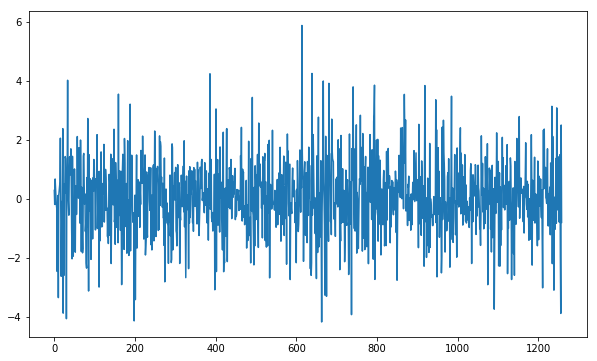

In [18]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

### Plotting the intervals

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

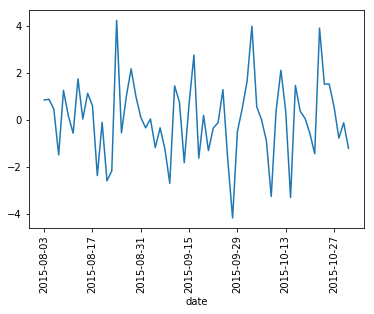

In [19]:
df.set_index('date')['2015-08-01':'2015-11-01']['1day % return'].plot()
plt.xticks(rotation='vertical')

### Analyse monthly mean of close column

In [22]:
df2 = df.copy()

In [23]:
df2['date'] = pd.to_datetime(df2['date'])

In [24]:
df2.set_index('date', inplace=True)

In [25]:
df2.head()

open   high    low  close    volume  Name  1day % return
date                                                                 
2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY       0.282586
2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY      -0.195001
2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY       0.669250
2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY       0.333041
2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY       0.070385

In [26]:
df2['close'].resample('M').mean()  # Here we have assigned EBAY data only to 'df2' which is copied from 'df'

date
2013-02-28    55.609286
2013-03-31    52.686750
2013-04-30    54.745000
2013-05-31    54.951364
2013-06-30    51.777100
                ...    
2017-10-31    37.872727
2017-11-30    36.060476
2017-12-31    37.403000
2018-01-31    39.195238
2018-02-28    43.596000
Freq: M, Name: close, Length: 61, dtype: float64

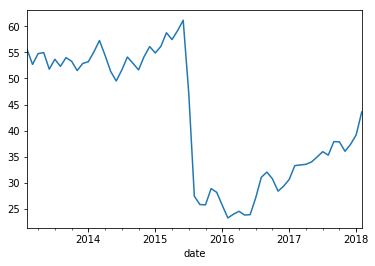

In [29]:
df2['close'].resample('M').mean().plot()

### Resampling Close column year wise

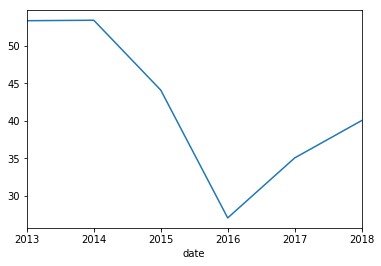

In [31]:
df2['close'].resample('Y').mean().plot()

### Finding the correlation between the stock prices of these Tech companies

In [32]:
df.head()

date   open   high    low  close    volume  Name  1day % return
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY       0.282586
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY      -0.195001
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY       0.669250
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY       0.333041
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY       0.070385

### Reading datas of tech companies

In [34]:
ebay = pd.read_csv("E:\Time Series Analysis/EBAY_data.csv")
ebay.head()

date   open   high    low  close    volume  Name
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY

In [35]:
fb = pd.read_csv("E:\Time Series Analysis/FB_data.csv")
fb.head()

date   open   high    low    close    volume Name
0  2013-02-08  28.89  29.17  28.51  28.5450  37662614   FB
1  2013-02-11  28.61  28.68  28.04  28.2600  36979533   FB
2  2013-02-12  27.67  28.16  27.10  27.3700  93417215   FB
3  2013-02-13  27.36  28.32  27.31  27.9075  50100805   FB
4  2013-02-14  28.02  28.63  28.01  28.5000  35581045   FB

In [36]:
ge = pd.read_csv("E:\Time Series Analysis/GE_data.csv")
ge.head()

date   open   high    low  close    volume Name
0  2013-02-08  22.50  22.56  22.45  22.50  24424506   GE
1  2013-02-11  22.49  22.51  22.35  22.45  19738628   GE
2  2013-02-12  22.48  22.65  22.48  22.58  34139526   GE
3  2013-02-13  23.11  23.48  23.04  23.39  84933955   GE
4  2013-02-14  23.25  23.49  23.11  23.41  53990644   GE

In [37]:
ibm = pd.read_csv("E:\Time Series Analysis/IBM_data.csv")
ibm.head()

date    open     high     low   close   volume Name
0  2013-02-08  199.97  202.090  199.68  201.68  2893254  IBM
1  2013-02-11  200.98  201.950  199.75  200.16  2944651  IBM
2  2013-02-12  200.01  200.735  199.02  200.04  2461779  IBM
3  2013-02-13  200.65  200.950  199.57  200.09  2169757  IBM
4  2013-02-14  199.73  200.320  199.26  199.65  3294126  IBM

In [38]:
# Creat a blank dataframe

close = pd.DataFrame()

In [40]:
close['ebay'] = ebay['close']
close['fb'] = fb['close']
close['ge'] = ge['close']
close['ibm'] = ibm['close']

In [41]:
close.head()

ebay       fb     ge     ibm
0  56.62  28.5450  22.50  201.68
1  56.41  28.2600  22.45  200.16
2  56.78  27.3700  22.58  200.04
3  57.05  27.9075  23.39  200.09
4  56.83  28.5000  23.41  199.65

### Multivariante Analysis

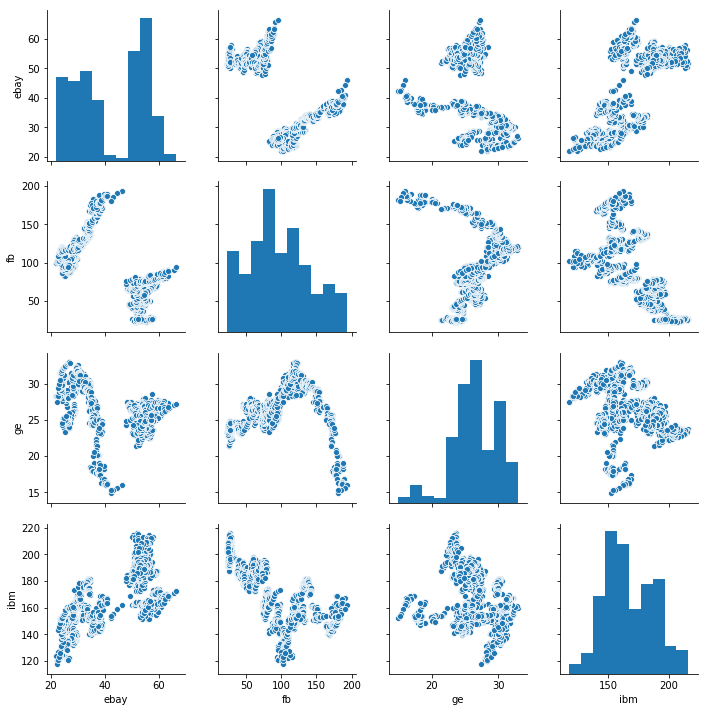

In [43]:
sns.pairplot(data=close)

### Correlation plot for stock prices

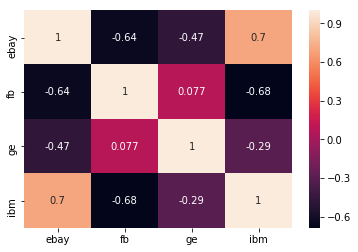

In [45]:
sns.heatmap(close.corr(), annot=True)

### Analyse daily return of each stock and how they are correlated

In [46]:
data = pd.DataFrame()

In [47]:
ebay.head()

date   open   high    low  close    volume  Name
0  2013-02-08  56.46  57.08  56.39  56.62   8066626  EBAY
1  2013-02-11  56.52  56.58  55.75  56.41   5150867  EBAY
2  2013-02-12  56.40  57.18  56.11  56.78  10023081  EBAY
3  2013-02-13  56.86  57.26  56.41  57.05   9095970  EBAY
4  2013-02-14  56.79  57.12  56.63  56.83   7054543  EBAY

In [49]:
data['ebay_change']=((ebay['close']-ebay['open'])/ebay['close'])*100
data['fb_change']=((fb['close']-fb['open'])/fb['close'])*100
data['ge_change']=((ge['close']-ge['open'])/ge['close'])*100
data['ibm_change']=((ibm['close']-ibm['open'])/ibm['close'])*100

In [50]:
data.head()

ebay_change  fb_change  ge_change  ibm_change
0     0.282586  -1.208618   0.000000    0.847878
1    -0.195001  -1.238500  -0.178174   -0.409672
2     0.669250  -1.096091   0.442870    0.014997
3     0.333041   1.961838   1.197093   -0.279874
4     0.070385   1.684211   0.683469   -0.040070

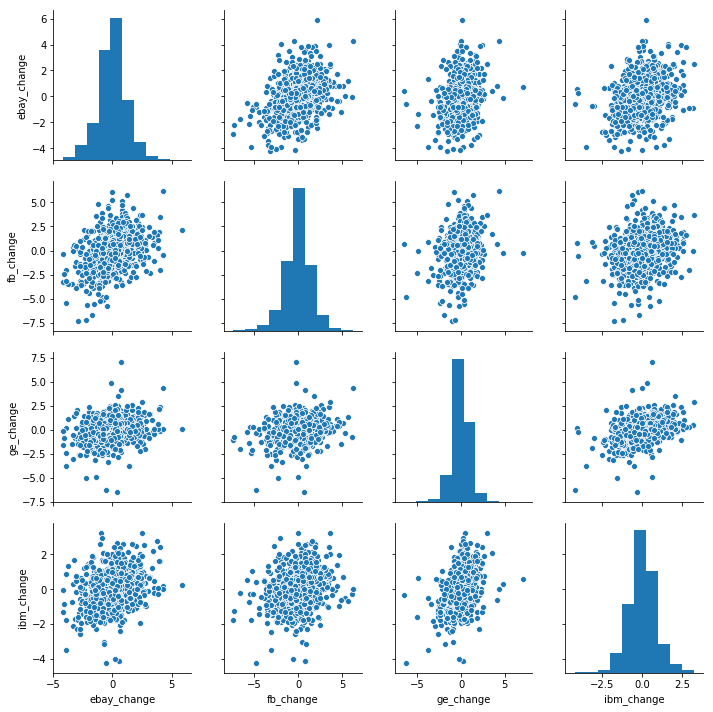

In [52]:
sns.pairplot(data=data)

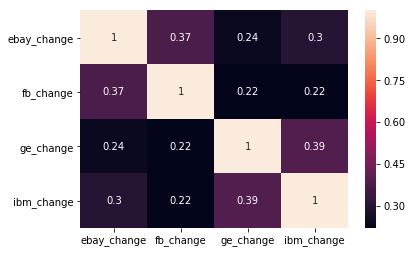

In [53]:
sns.heatmap(data.corr(), annot=True)

### Value at Risk Analysis for EBAY

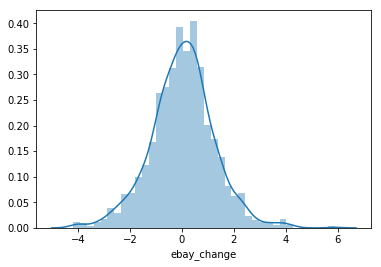

In [54]:
sns.distplot(data['ebay_change'])

#### In the above plot, it somehow follows the Normal Distribution

In [56]:
data['ebay_change'].std()

1.2327580559448883

In [57]:
data['ebay_change'].quantile(0.1)

-1.4839329054190722

#### -1.4839329054190722 means that 90% of the times the worst daily Loss will not exceed 1.42

In [60]:
data.describe().T

count      mean       std       min       25%       50%  \
ebay_change  1259.0  0.032779  1.232758 -4.183927 -0.706485  0.052562   
fb_change    1259.0 -0.005020  1.544814 -7.339839 -0.801400  0.037608   
ge_change    1259.0 -0.029598  1.005032 -6.519453 -0.550132 -0.032648   
ibm_change   1259.0  0.013804  0.874552 -4.242338 -0.486742  0.006366   

                  75%       max  
ebay_change  0.749894  5.880294  
fb_change    0.819780  6.163966  
ge_change    0.506231  7.091901  
ibm_change   0.523663  3.250933